In [2]:
import numpy as np
# from ieee80211phy.receiver.conv_coding import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
1/64

0.015625

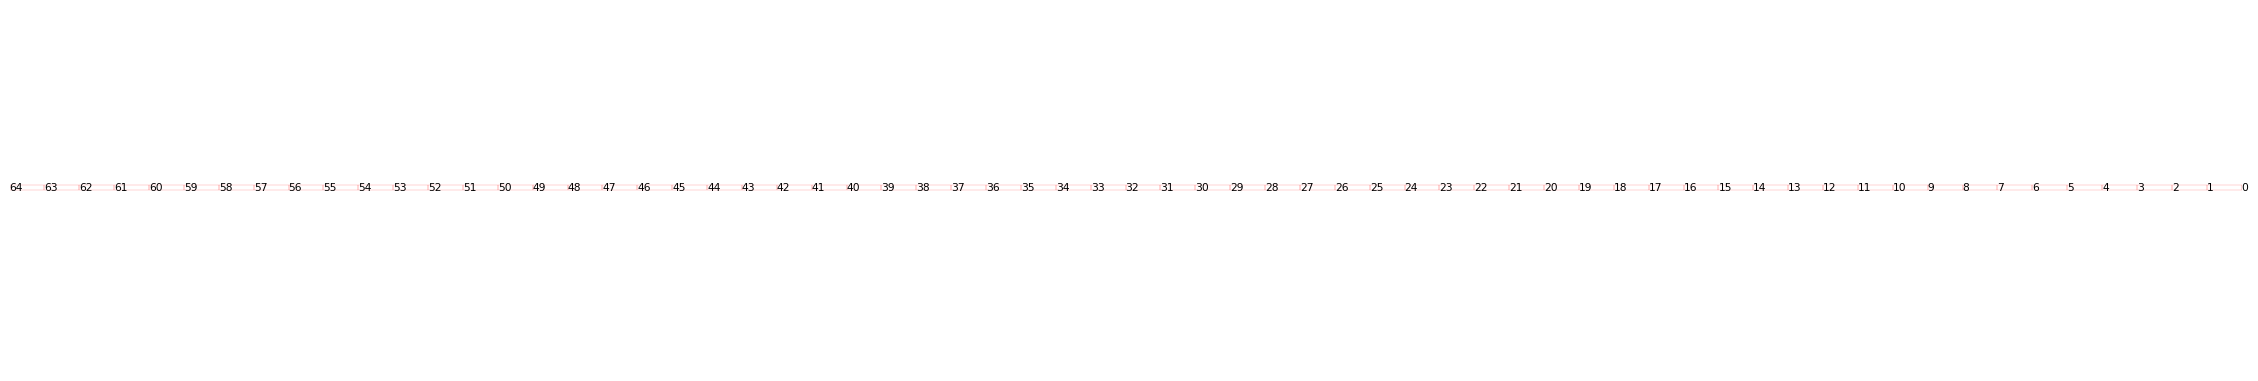

In [4]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(30, 5), dpi=96)

# Create a Rectangle patch
per = 1/64
for i in range(65):
    x = 1-(i*per)
    rect = patches.Rectangle((x,0.5),per,per,
                             linewidth=0.125,
                             edgecolor='r',
                             facecolor='none')
    ax.text(x, 0.5, s=str(i), fontsize=8)
    # Add the patch to the Axes
    ax.add_patch(rect)

# plt.show()
plt.axis('off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('foo.eps', format='eps', bbox_inches='tight', pad_inches = 0)

In [5]:
import pygraphviz as pgv

A=pgv.AGraph()

A.add_node('b')
A.add_edge('b',2)
A.add_edge(1,2)
A.add_edge(2,3)
A.add_edge(1,3)

A.layout(prog='dot') # layout with default (neato)
A.draw('simple.png') # draw png
print("Wrote simple.png")

Wrote simple.png


In [ ]:
base = Node('000000')
populate_outputs_recursive(base)
print(len(Node.instances))

In [6]:
import pygraphviz as pgv

A=pgv.AGraph(overlap='False', splines='true')

for k, v in Node.instances.items():
    idn = int(k[::-1], 2)
    A.add_node(idn, width='0.1', fontsize='10')
    A.add_edge(idn,int(v.path_out[0].end.state[::-1], 2), dir='forward', arrowsize='0.25')
#     A.add_edge(idn,int(v.path_out[1].end.state[::-1], 2), dir='forward', arrowsize='0.25')

# A.add_node('b')
# A.add_edge('b',2)
# A.add_edge(1,2)
# A.add_edge(2,3)
# A.add_edge(1,3)

# ValueError: Program lefty is not one of: neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvpr, ccomps, sccmap, tred, sfdp.
A.layout(prog='neato') # layout with default (neato)
A.draw('simple.png') # draw png
A.write("file.dot")
print("Wrote simple.png")

NameError: name 'Node' is not defined

![alt text](simple.png "Title")

In [ ]:

states = []
def f(inp):
    zshr, zo = f(shr, '0')
    oshr, oo = f(shr, '1')
    print(f'{shr} 0/{zo} -> {zshr} 1/{oo} -> {oshr}')
    return shr, output
    
f('000000', '0')
f('000000', '1')

In [91]:
def convolutional_encoder(data):
    output = ''
    shr = '00'
    for bit in data:
        out_a = int(bit) ^ int(shr[0])
        out_b = int(bit) ^ int(shr[0]) ^ int(shr[1])
        output += str(out_b) + str(out_a)
        shr = bit + shr[:-1]  # advance the shift register
        
    return output
        
convolutional_encoder('101100')

'111101000110'

In [112]:

def outp(shr, bit):
    out_a = int(bit) ^ int(shr[1]) ^ int(shr[2]) ^ int(shr[4]) ^ int(shr[5])
    out_b = int(bit) ^ int(shr[0]) ^ int(shr[1]) ^ int(shr[2]) ^ int(shr[5])
    output = str(out_a) + str(out_b)
    return output

for i in range(64):
    parent1 = (i << 1)%64
    bit = (i) >> 5
    parent2 = (parent1 + 1)%64
    
    out1 = outp(bin(parent1)[2:].zfill(6), str(bit))
    out2 = outp(bin(parent2)[2:].zfill(6), str(bit))
    
    if out1[0] == '1':
        assert out2[0] == '0'
    else:
        assert out2[0] == '1'
        
    if out1[1] == '1':
        assert out2[1] == '0'
    else:
        assert out2[1] == '1'
#     assert out1[0] == out2[1]
    print(f'{i}\t <--{bit}-- {parent1}[{out1}], {parent2}[{out2}]')


0	 <--0-- 0[00], 1[11]
1	 <--0-- 2[10], 3[01]
2	 <--0-- 4[00], 5[11]
3	 <--0-- 6[10], 7[01]
4	 <--0-- 8[11], 9[00]
5	 <--0-- 10[01], 11[10]
6	 <--0-- 12[11], 13[00]
7	 <--0-- 14[01], 15[10]
8	 <--0-- 16[11], 17[00]
9	 <--0-- 18[01], 19[10]
10	 <--0-- 20[11], 21[00]
11	 <--0-- 22[01], 23[10]
12	 <--0-- 24[00], 25[11]
13	 <--0-- 26[10], 27[01]
14	 <--0-- 28[00], 29[11]
15	 <--0-- 30[10], 31[01]
16	 <--0-- 32[01], 33[10]
17	 <--0-- 34[11], 35[00]
18	 <--0-- 36[01], 37[10]
19	 <--0-- 38[11], 39[00]
20	 <--0-- 40[10], 41[01]
21	 <--0-- 42[00], 43[11]
22	 <--0-- 44[10], 45[01]
23	 <--0-- 46[00], 47[11]
24	 <--0-- 48[10], 49[01]
25	 <--0-- 50[00], 51[11]
26	 <--0-- 52[10], 53[01]
27	 <--0-- 54[00], 55[11]
28	 <--0-- 56[01], 57[10]
29	 <--0-- 58[11], 59[00]
30	 <--0-- 60[01], 61[10]
31	 <--0-- 62[11], 63[00]
32	 <--1-- 0[11], 1[00]
33	 <--1-- 2[01], 3[10]
34	 <--1-- 4[11], 5[00]
35	 <--1-- 6[01], 7[10]
36	 <--1-- 8[00], 9[11]
37	 <--1-- 10[10], 11[01]
38	 <--1-- 12[00], 13[11]
39	 <--1-- 14[10